<a href="https://colab.research.google.com/github/nguyennhutlam/sockpuppet_final_19_07_2020/blob/master/1_Plot_sockpuppet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def ecdf(data):
    """Compute x, y values for an empirical distribution function."""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y
# compute ecdf based on an attribute
def get_data(data, attribute):
  legitimate_user = (data.loc[data['class']==1])[attribute]
  sockpuppet = (data.loc[data['class']==0])[attribute]
  x1, y1 = ecdf(legitimate_user)
  x0, y0 = ecdf(sockpuppet)
  return x1, y1, x0, y0 

# plot ecdf (log scale x)
def plot_ecdf_logx(data, attribute):
  x1, y1, x0, y0 = get_data(data, attribute)  
  plt.plot(x1, y1, marker='o', linestyle=':', mfc='none' )
  plt.plot(x0, y0, marker='D', linestyle=':',  mfc='none')
  plt.xscale('log')
  plt.margins(0.02)
  plt.legend(('Legitimate user', 'Sockpuppet'), loc='lower right')
  plt.xlabel(attribute)
  plt.ylabel('ECDF')

def plot_ecdf(data, attribute):
  x1, y1, x0, y0 = get_data(data, attribute)  
  plt.plot(x1, y1, marker='o', linestyle=':', mfc='none' )
  plt.plot(x0, y0, marker='D', linestyle=':',  mfc='none')
  # plt.xscale('log')
  plt.margins(0.02)
  plt.legend(('Legitimate user', 'Sockpuppet'), loc='lower right')
  plt.xlabel(attribute)
  plt.ylabel('ECDF')

1    106230
0      1668
Name: class, dtype: int64

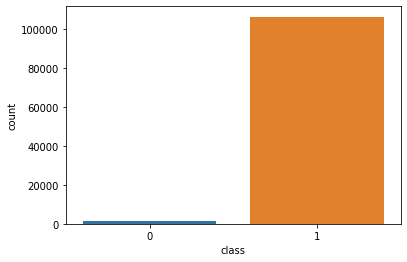

In [3]:
file ="https://raw.githubusercontent.com/nguyennhutlam/sockpuppet_dataset/master/Feature_29_final.csv"
data = pd.read_csv(file)
data.type.replace(['Sockpuppet','Legitimate_user'], [0, 1], inplace = True)
data = data.drop(columns=['id']) #remove id column
data['class'] = data['type']
data = data.drop(columns=['type']) #remove type columns
sns.countplot(x='class', data=data)
# number of instances in each class
data['class'].value_counts()

In [4]:
 data.columns

Index(['number_of_articles', 'number_of_post_per_day',
       'no_posted_articles_working_time', 'no_posted_articles_leisure_time',
       'differ_working_leisure_time', 'number_of_received_comments',
       'number_of_self_comments', 'number_of_given_comments',
       'number_of_received_comments_per_article', 'received_rating_push',
       'received_rating_boo', 'received_rating_ratio',
       'num_of_commented_articles', 'number_of_all_comments',
       'number_of_comments_per_article', 'reponse_time_mean',
       'median_post_interval', 'diff_weekday_weekend', 'median_push_interval',
       'degree', 'degree_out', 'degree_in', 'hubs', 'authorities', 'closeness',
       'betweenness', 'clustF', 'class'],
      dtype='object')

In [ ]:
# plt.figure(figsize=(15, 30), constrained_layout=True)
# for i in range(1,data.columns.size):
#   plt.subplot(10, 3, i)
#   plot_ecdf_logx(data, data.columns[i])

**Plot user behaviour features**

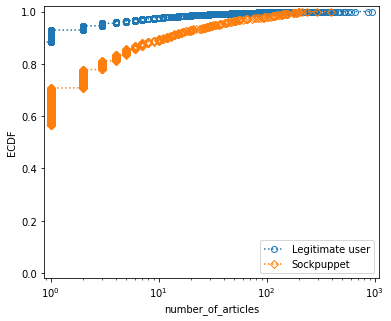

In [5]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[0])

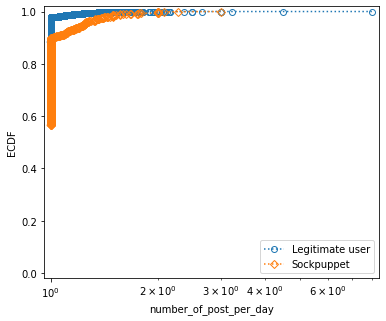

In [6]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[1])

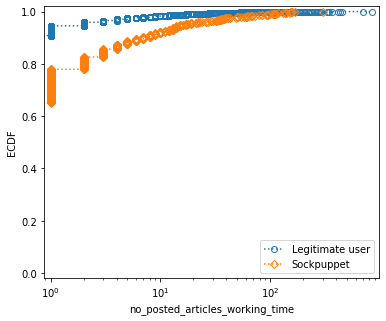

In [7]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[2])

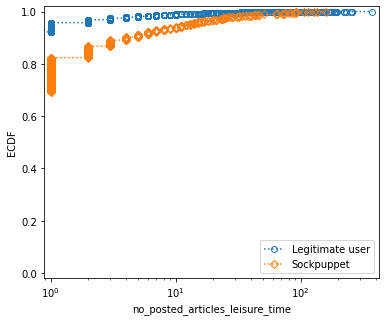

In [8]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[3])

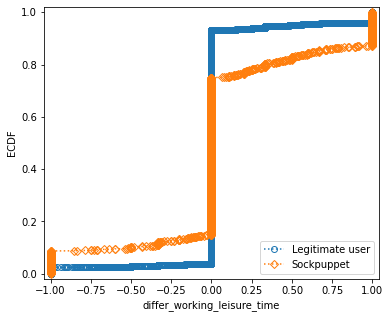

In [9]:
plt.figure(figsize=(6, 5))
plot_ecdf(data, data.columns[4])

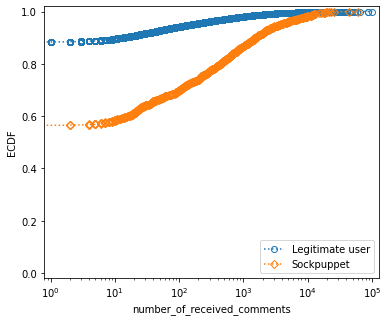

In [11]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[5])

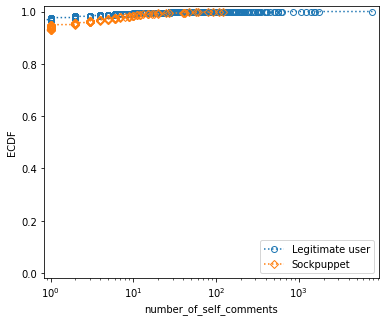

In [13]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[6])

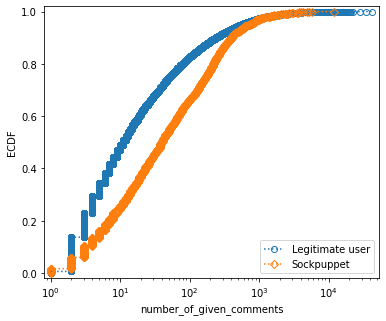

In [15]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[7])

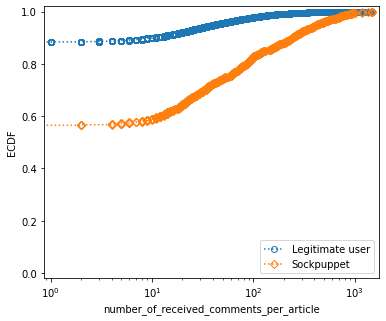

In [17]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[8])

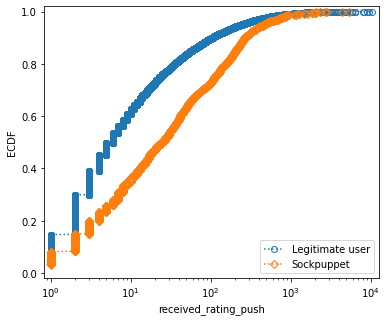

In [19]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[9])

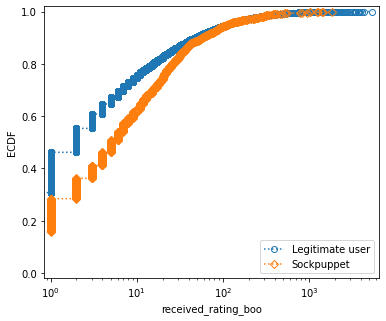

In [21]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[10])

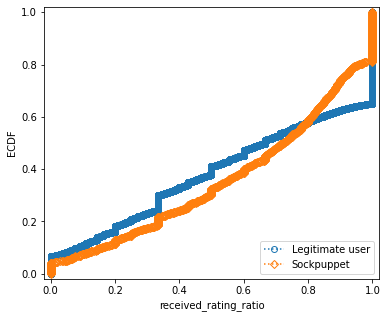

In [22]:
plt.figure(figsize=(6, 5))
plot_ecdf(data, data.columns[11])

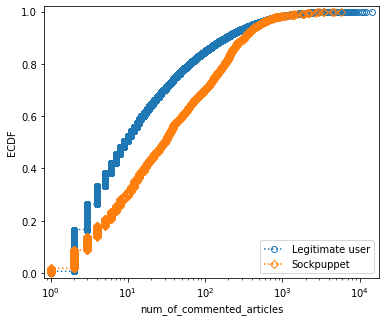

In [24]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[12])

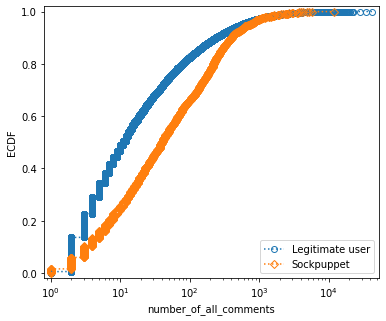

In [26]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[13])

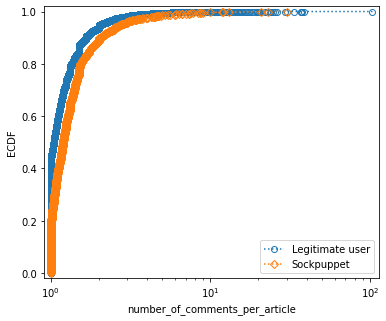

In [28]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[14])

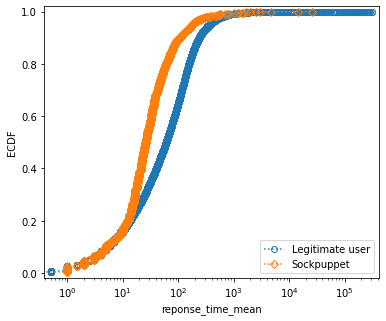

In [29]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[15])

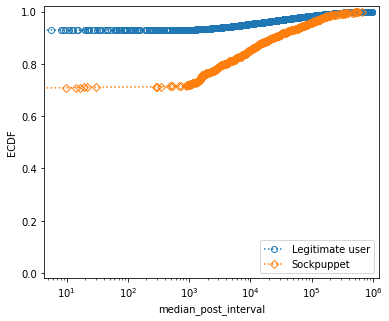

In [32]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[16])

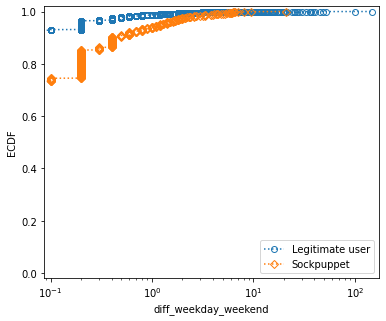

In [33]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[17])

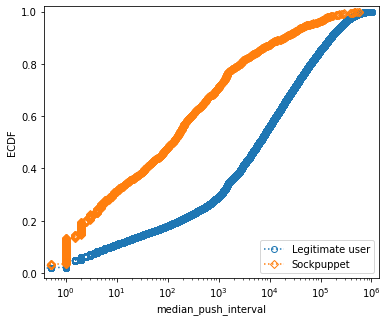

In [34]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[18])

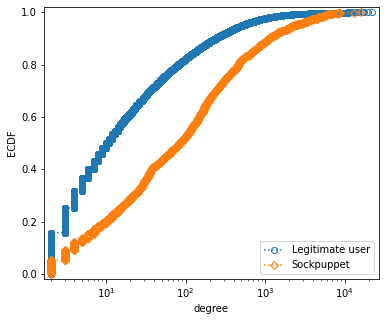

In [35]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[19])

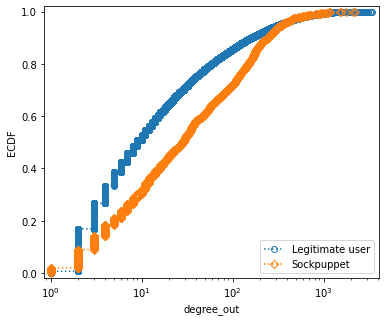

In [36]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[20])

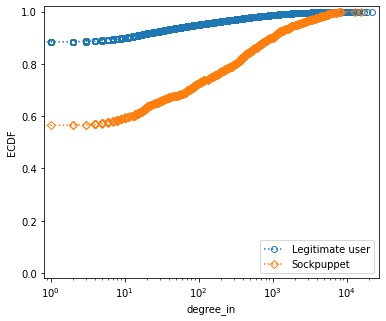

In [37]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[21])

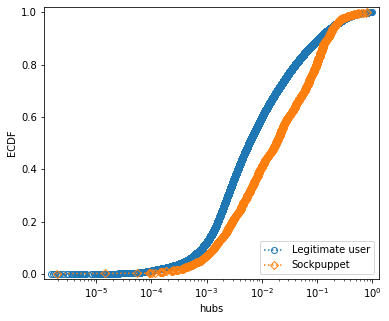

In [38]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[22])

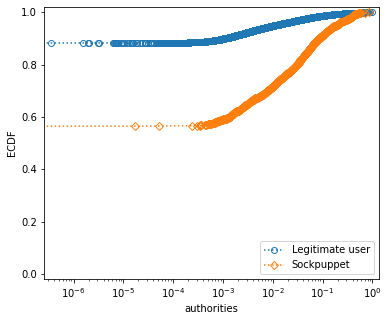

In [39]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[23])

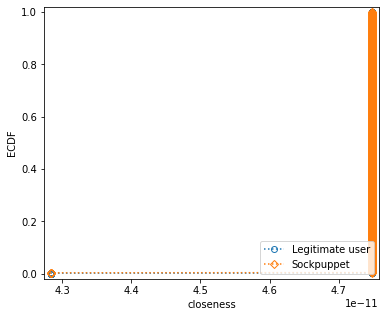

In [41]:
plt.figure(figsize=(6, 5))
plot_ecdf(data, data.columns[24])

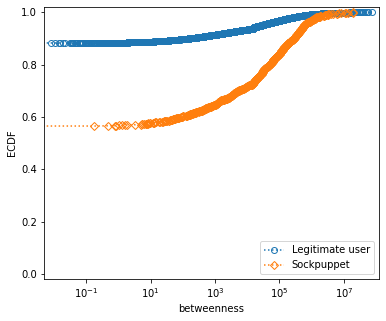

In [42]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[25])

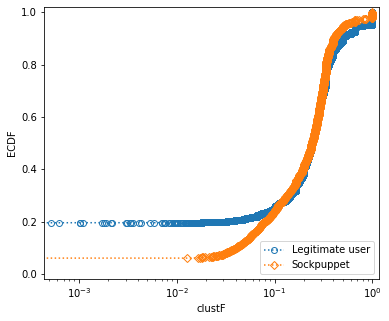

In [43]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[26])

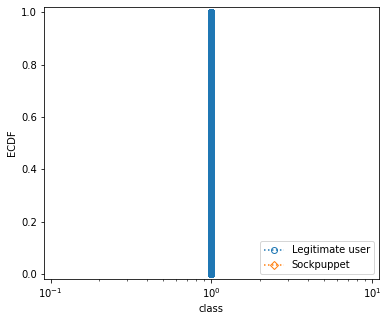

In [44]:
plt.figure(figsize=(6, 5))
plot_ecdf_logx(data, data.columns[27])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(0,4):
   plt.subplot(1, 4, i+1)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(4,8):
   plt.subplot(1, 4, i-3)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(8,12):
   plt.subplot(1, 4, i-7)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(12,16):
   plt.subplot(1, 4, i-11)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(16,20):
   plt.subplot(1, 4, i-15)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(20,24):
   plt.subplot(1, 4, i-19)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(24,27):
   plt.subplot(1, 4, i-23)
   plot_ecdf_logx(data, data.columns[i])

In [ ]:
plot_ecdf(data, data.columns[24])

In [ ]:
data['closeness']